<a href="https://colab.research.google.com/github/abhi-gm/Machine-Learning-Workshop/blob/Classical-Machine-Learning/2_Decision_tress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. Decision tress**

##**1.Abstract**

**Churn rate**, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time. The notebook aims to do prediction whether a customer will churn or not.

## **2.Importing necessary libraries**

In [ ]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from pandas import DataFrame

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

## **3. Import the data from Github**

In [ ]:
url =  'https://raw.githubusercontent.com/abhi-gm/Machine-Learning-Workshop/main/Datasets/Churn.csv?token=ALKWD7ANY3GXARLZV63DLZLAL5GMG'
data = pd.read_csv(url, error_bad_lines=False)

In [ ]:
data.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(6499, 21)

## **4.Preprocessing the data**

### **4.1.Droping unique columns**

In [ ]:
data = data.drop('CustomerID',axis =1)

### **4.2.Encoding the categorical columns**

In [ ]:
data.dtypes

Gender                object
Senior Citizen         int64
Partner               object
Dependents            object
Tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn                 object
dtype: object

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns

continous_columns = data.select_dtypes(exclude=['object']).columns


In [ ]:
#the categorical columns
categorical_columns

Index(['Gender', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Churn'],
      dtype='object')

In [ ]:
#making categorical columns into categorical data type
data[categorical_columns] = data[categorical_columns].astype('category')

In [ ]:
data.dtypes

Gender               category
Senior Citizen          int64
Partner              category
Dependents           category
Tenure                  int64
Phone Service        category
Multiple Lines       category
Internet Service     category
Online Security      category
Online Backup        category
Device Protection    category
Tech Support         category
Streaming TV         category
Streaming Movies     category
Contract             category
Paperless Billing    category
Payment Method       category
Monthly Charges       float64
Total Charges         float64
Churn                category
dtype: object

In [ ]:
#dictionary to store mapping
col_cat_dict = {}
#numerical encoding the catecogrical columns using function cat codes
for col in categorical_columns:
  col_cat_dict[col] = dict(enumerate(data[col].cat.categories))
  data[col] = data[col].cat.codes
  data[col] = data[col].astype('category')

In [ ]:
col_cat_dict

{'Churn': {0: 'No', 1: 'Yes'},
 'Contract': {0: 'Month-to-month', 1: 'One year', 2: 'Two year'},
 'Dependents': {0: 'No', 1: 'Yes'},
 'Device Protection': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'Gender': {0: 'Female', 1: 'Male'},
 'Internet Service': {0: 'DSL', 1: 'Fiber optic', 2: 'No'},
 'Multiple Lines': {0: 'No', 1: 'No phone service', 2: 'Yes'},
 'Online Backup': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'Online Security': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'Paperless Billing': {0: 'No', 1: 'Yes'},
 'Partner': {0: 'No', 1: 'Yes'},
 'Payment Method': {0: 'Bank transfer (automatic)',
  1: 'Credit card (automatic)',
  2: 'Electronic check',
  3: 'Mailed check'},
 'Phone Service': {0: 'No', 1: 'Yes'},
 'Streaming Movies': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'Streaming TV': {0: 'No', 1: 'No internet service', 2: 'Yes'},
 'Tech Support': {0: 'No', 1: 'No internet service', 2: 'Yes'}}

In [ ]:
data.dtypes

Gender               category
Senior Citizen          int64
Partner              category
Dependents           category
Tenure                  int64
Phone Service        category
Multiple Lines       category
Internet Service     category
Online Security      category
Online Backup        category
Device Protection    category
Tech Support         category
Streaming TV         category
Streaming Movies     category
Contract             category
Paperless Billing    category
Payment Method       category
Monthly Charges       float64
Total Charges         float64
Churn                category
dtype: object

In [ ]:
data.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## **4.3 Handling missing values**

Filling the NaN values for the categorical column with mode
 
Filling the NAN vaules for the continous columns with mean

In [ ]:
for col in categorical_columns:
  data[col] = data[col].fillna(data[col].mode())

for col in continous_columns:
  data[col] = data[col].fillna(data[col].mean())

In [ ]:
#Checking wether there is any NAN values
data.isnull().sum() 

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

## **5.Training to get the variable importance**

In [ ]:
feature = data.columns.tolist()
feature.remove('Churn')

X = data[ feature]

y = data['Churn']

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## **6.1.Feature Importance**

Feature: 0, Score: 0.02582
Feature: 1, Score: 0.02087
Feature: 2, Score: 0.01498
Feature: 3, Score: 0.01503
Feature: 4, Score: 0.10684
Feature: 5, Score: 0.00130
Feature: 6, Score: 0.01989
Feature: 7, Score: 0.02770
Feature: 8, Score: 0.04479
Feature: 9, Score: 0.01653
Feature: 10, Score: 0.01314
Feature: 11, Score: 0.01820
Feature: 12, Score: 0.00900
Feature: 13, Score: 0.01126
Feature: 14, Score: 0.16950
Feature: 15, Score: 0.02090
Feature: 16, Score: 0.04635
Feature: 17, Score: 0.20785
Feature: 18, Score: 0.21006


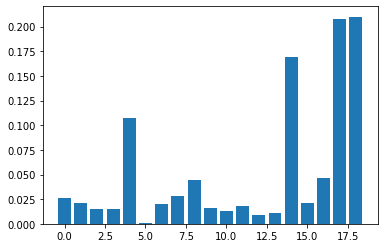

In [ ]:
importance = dtree.feature_importances_
from matplotlib import pyplot

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
var_imp = importance.tolist()

In [ ]:
feature = data.columns.tolist()
feature.remove('Churn')

df_varimp =  DataFrame (feature,columns=['Features'])
df_varimp["var_imp"] =var_imp
df_varimp_sorted=df_varimp.sort_values(by=['var_imp'],ascending=False)
df_varimp_sorted



,Features,var_imp
18,Total Charges,0.210063
17,Monthly Charges,0.207847
14,Contract,0.169505
4,Tenure,0.106837
16,Payment Method,0.046349
8,Online Security,0.044788
7,Internet Service,0.027699
0,Gender,0.025821
15,Paperless Billing,0.020903
1,Senior Citizen,0.020871


## **6.2.Feature Selection**

thres is set 0.05 which configurable

In [ ]:
thres = 0.05
imp_data = df_varimp_sorted[df_varimp_sorted['var_imp']>thres]
feat = imp_data['Features']


In [ ]:
data [feat]

,Total Charges,Monthly Charges,Contract,Tenure
0,29.85,29.85,0,1
1,1889.50,56.95,1,34
2,108.15,53.85,0,2
3,1840.75,42.30,1,45
4,151.65,70.70,0,2
...,...,...,...,...
6494,786.50,29.80,0,26
6495,69.65,69.65,0,1
6496,4086.30,101.85,0,40
6497,5364.80,103.05,0,52


### **7.1.Train ,Validation and Test split**

Data is split into 3 parts

Taining data set = 80.75%

Validation data set = 14.25%

Test data set = 5%

In [ ]:
from sklearn.model_selection import  train_test_split

columns = data[feat].columns

X = data[feat]

y = data['Churn']

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

### **7.2.Processing data for decision tree**

In [ ]:
feature = data.columns
y = data['Churn']
data = data.drop(('Churn'),axis = 1)
data = data.fillna(0)

## **8. Tunning the Hyperparmeter**

Using grid search for Hyperparmeter tunning, even randomized grid search can be employed for doing grid search which will faster than normal grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
depths = np.arange(2, 5)
num_leafs = [ 20,30,40,50]
nodes =np.arange(24, 30)
criteria = ['entropy']
split = ['best', 'random']

In [ ]:
param_grid = [{'max_depth':depths,
              'min_samples_leaf':num_leafs,'max_leaf_nodes':nodes,'criterion':criteria}]

In [ ]:
grid = GridSearchCV(dtree, param_grid, cv=10, scoring='accuracy',verbose=1)

In [ ]:
s = grid.fit(X_val, y_val)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    4.5s finished


In [ ]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.764866760168303
{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 24, 'min_samples_leaf': 50}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=24,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


## **9. Training important Features**


After the hyperparameter tunning

**max_depth**: 3

**max_leaf_nodes**: 24 

**min_samples_leaf**: 50

In [ ]:
dtree=DecisionTreeClassifier(max_depth= 3, max_leaf_nodes= 24, min_samples_leaf= 50,criterion='entropy')
model = dtree.fit(X_train,y_train)

In [ ]:
y_predicted = model.predict(X_test)
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_predicted))


0.76


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted)

array([[226,  13],
       [ 65,  21]])

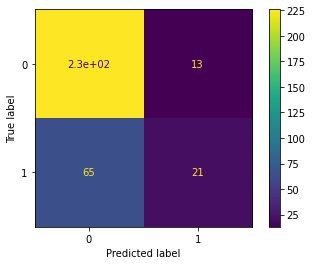

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(model, X_test, y_test)  
plt.show() 

## **10. Conclusion**

So finally the model predictions is good and we can predict customer churn with 76% accuracy.

## **11.Reference**

https://scikit-learn.org/stable/modules/tree.html

Copyright 2020 Abhishek Gargha Maheshwarappa

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.